In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_class):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, num_class)

    def forward(self, x):
        fcHead = F.relu(self.fc1(x))
        fcHead = self.fc2(fcHead)
        return fcHead

In [11]:
#   Set device 
device  = 'cuda' if torch.cuda.is_available() else 'cpu'

In [14]:
model = NeuralNet(784, 10)
x = torch.randn(36, 784)
model(x).shape

torch.Size([36, 10])

In [4]:
#   Hyperparameters
input_size = 784
num_class = 10
learning_rate = 1e-3
batch_size = 32
num_epochs = 15

In [5]:
#   Load data
train_data = datasets.MNIST(root = 'Datasets\\', train = True, transform = transforms.ToTensor(), download = False)
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)

test_data = datasets.MNIST(root = 'Datasets\\', train = False, transform = transforms.ToTensor(), download = False)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

In [6]:
model = NeuralNet(input_size = input_size, num_class = num_class).to(device = device)

In [7]:
#   Loss and optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [8]:
#   Train network
loss_cummul = []
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        #   Get data to cuda if possible
        data = data.to(device = device)
        targets = targets.to(device = device)
        #   Get to correct shape
        data = data.reshape(data.shape[0], -1)

        #   Forward pass
        scores = model(data)
        loss = loss_func(scores, targets)
        loss_cummul.append(loss)


        #   Backward pass
        loss.backward()

        #   Optimization
        optimizer.step()
        optimizer.zero_grad()

In [ ]:
np_loss = []
for loss in loss_cummul:
    np_loss.append(loss.detach().to('cpu').numpy())

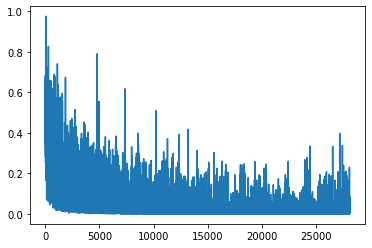

In [ ]:
plt.plot(np_loss)

In [ ]:
def check_acc(loader):
    if loader.dataset.train:
        print("Checking acc on training dataset:", end = ' ')
    else:
        print("Checking acc on test dataset:", end = ' ')
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device = device)
            y = y.to(device = device)
            x = x.reshape(x.shape[0], -1)

            scores = model(x)
            _, pred = scores.max(dim = 1)
            num_correct += (pred == y).sum()
            num_samples += pred.shape[0]
    print(f"Got {num_correct}/{num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
            

In [ ]:
check_acc(test_loader)

Checking acc on test dataset: Got 9776/10000 with accuracy 97.76
